In [1]:
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')
# os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/')

import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import *
from s2_angs import *
from scipy.ndimage import zoom
from matplotlib.patches import Polygon
from cartopy.mpl.patch import geos_to_path

In [2]:
# Charger les tableaux du 27/04/2023
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')
# os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/coh_sup06/')

# os.chdir('Californie/27_04_2023_results/Rascle_et_al/Results/')

U_BF = np.load('U_BF.npy')
V_BF = np.load('V_BF.npy')

lat_BF=np.load('lat_BF.npy')
lon_BF=np.load('lon_BF.npy')

C_BF=np.load('C_BF.npy')

#BG
U_BG = np.load('U_BG.npy')
V_BG = np.load('V_BG.npy')

lat_BG=np.load('lat_BG.npy')
lon_BG=np.load('lon_BG.npy')

C_BG=np.load('C_BG.npy')

#BH
U_BH = np.load('U_BH.npy')
V_BH = np.load('V_BH.npy')

lat_BH=np.load('lat_BH.npy')
lon_BH=np.load('lon_BH.npy')

C_BH=np.load('C_BH.npy')

# CF

U_CF = np.load('U_CF.npy')
V_CF = np.load('V_CF.npy')

lat_CF=np.load('lat_CF.npy')
lon_CF=np.load('lon_CF.npy')

C_CF=np.load('C_CF.npy')

#CG

U_CG = np.load('U_CG.npy')
V_CG = np.load('V_CG.npy')

lat_CG=np.load('lat_CG.npy')
lon_CG=np.load('lon_CG.npy')

C_CG=np.load('C_CG.npy')

#CJ

U_CJ = np.load('U_CJ.npy')
V_CJ = np.load('V_CJ.npy')

lat_CJ=np.load('lat_CJ.npy')
lon_CJ=np.load('lon_CJ.npy')

C_CJ=np.load('C_CJ.npy')
#CH

U_CH = np.load('U_CH.npy')
V_CH = np.load('V_CH.npy')

lat_CH=np.load('lat_CH.npy')
lon_CH=np.load('lon_CH.npy')

C_CH=np.load('C_CH.npy')

# DF

U_DF = np.load('U_DF.npy')
V_DF = np.load('V_DF.npy')

lat_DF=np.load('lat_DF.npy')
lon_DF=np.load('lon_DF.npy')

C_DF=np.load('C_DF.npy')

#DG

U_DG = np.load('U_DG.npy')
V_DG = np.load('V_DG.npy')

lat_DG=np.load('lat_DG.npy')
lon_DG=np.load('lon_DG.npy')

C_DG=np.load('C_DG.npy')

#DH

U_DH = np.load('U_DH.npy')
V_DH = np.load('V_DH.npy')

lat_DH=np.load('lat_DH.npy')
lon_DH=np.load('lon_DH.npy')

C_DH=np.load('C_DH.npy')

In [3]:
# Fonction de filtrage par magnitude
def filter_vectors(lon, lat, U, V, C, threshold):
    magnitude = np.sqrt(U**2 + V**2)
    mask = magnitude <= threshold
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]

magnitude_threshold = 1.5  

In [4]:
lon_BF10, lat_BF10, U_BF10, V_BF10, C_BF10 = filter_vectors(lon_BF, lat_BF, U_BF, V_BF, C_BF, magnitude_threshold)
lon_BG10, lat_BG10, U_BG10, V_BG10, C_BG10 = filter_vectors(lon_BG, lat_BG, U_BG, V_BG, C_BG, magnitude_threshold)
lon_BH10, lat_BH10, U_BH10, V_BH10, C_BH10 = filter_vectors(lon_BH, lat_BH, U_BH, V_BH, C_BH, magnitude_threshold)

lon_CF10, lat_CF10, U_CF10, V_CF10, C_CF10 = filter_vectors(lon_CF, lat_CF, U_CF, V_CF, C_CF, magnitude_threshold)
lon_CG10, lat_CG10, U_CG10, V_CG10, C_CG10 = filter_vectors(lon_CG, lat_CG, U_CG, V_CG, C_CG, magnitude_threshold)
lon_CJ10, lat_CJ10, U_CJ10, V_CJ10, C_CJ10 = filter_vectors(lon_CJ, lat_CJ, U_CJ, V_CJ, C_CJ, magnitude_threshold)
lon_CH10, lat_CH10, U_CH10, V_CH10, C_CH10 = filter_vectors(lon_CH, lat_CH, U_CH, V_CH, C_CH, magnitude_threshold)

lon_DF10, lat_DF10, U_DF10, V_DF10, C_DF10 = filter_vectors(lon_DF, lat_DF, U_DF, V_DF, C_DF, magnitude_threshold)
lon_DG10, lat_DG10, U_DG10, V_DG10, C_DG10 = filter_vectors(lon_DG, lat_DG, U_DG, V_DG, C_DG, magnitude_threshold)
lon_DH10, lat_DH10, U_DH10, V_DH10, C_DH10 = filter_vectors(lon_DH, lat_DH, U_DH, V_DH, C_DH, magnitude_threshold)

In [5]:
# Normalisation

U_BF_norm=U_BF10/C_BF10
V_BF_norm=V_BF10/C_BF10

U_BG_norm=U_BG10/C_BG10
V_BG_norm=V_BG10/C_BG10

U_BH_norm=U_BH10/C_BH10
V_BH_norm=V_BH10/C_BH10

U_CF_norm=U_CF10/C_CF10
V_CF_norm=V_CF10/C_CF10

U_CG_norm=U_CG10/C_CG10
V_CG_norm=V_CG10/C_CG10

U_CH_norm=U_CH10/C_CH10
V_CH_norm=V_CH10/C_CH10

U_CJ_norm=U_CJ10/C_CJ10
V_CJ_norm=V_CJ10/C_CJ10

U_DF_norm=U_DF10/C_DF10
V_DF_norm=V_DF10/C_DF10

U_DG_norm=U_DG10/C_DG10
V_DG_norm=V_DG10/C_DG10

U_DH_norm=U_DH10/C_DH10
V_DH_norm=V_DH10/C_DH10


/tmp/ipykernel_36282/2540539498.py:3: RuntimeWarning: invalid value encountered in divide
  U_BF_norm=U_BF10/C_BF10
/tmp/ipykernel_36282/2540539498.py:4: RuntimeWarning: invalid value encountered in divide
  V_BF_norm=V_BF10/C_BF10
/tmp/ipykernel_36282/2540539498.py:6: RuntimeWarning: invalid value encountered in divide
  U_BG_norm=U_BG10/C_BG10
/tmp/ipykernel_36282/2540539498.py:7: RuntimeWarning: invalid value encountered in divide
  V_BG_norm=V_BG10/C_BG10
/tmp/ipykernel_36282/2540539498.py:9: RuntimeWarning: invalid value encountered in divide
  U_BH_norm=U_BH10/C_BH10
/tmp/ipykernel_36282/2540539498.py:10: RuntimeWarning: invalid value encountered in divide
  V_BH_norm=V_BH10/C_BH10
/tmp/ipykernel_36282/2540539498.py:12: RuntimeWarning: invalid value encountered in divide
  U_CF_norm=U_CF10/C_CF10
/tmp/ipykernel_36282/2540539498.py:13: RuntimeWarning: invalid value encountered in divide
  V_CF_norm=V_CF10/C_CF10
/tmp/ipykernel_36282/2540539498.py:15: RuntimeWarning: invalid value 

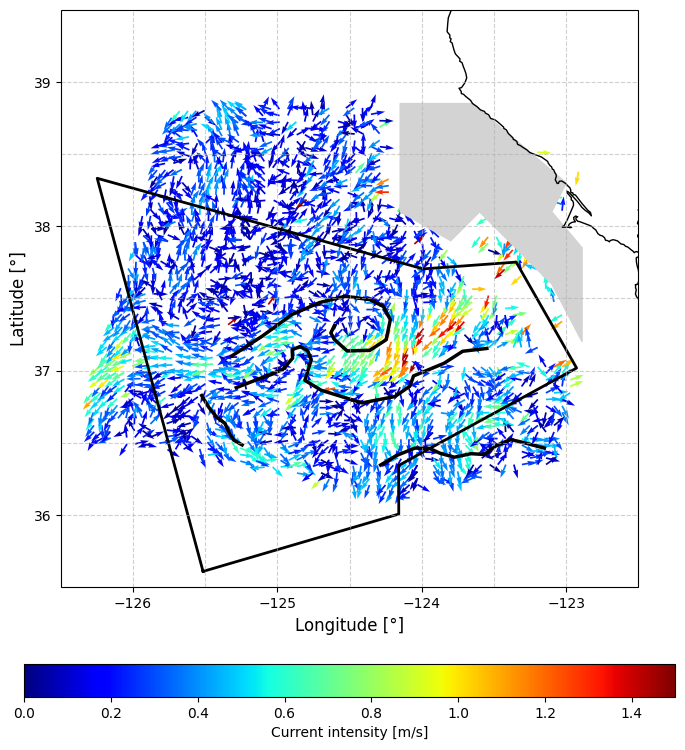

In [47]:
# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]


polygon_coords = [
    (38.85, -124.15),  
    (38.85, -123.65), 
    (38.3, -123.0),  
    (38.1, -123.1),  
    (37.85, -122.89), 
    (37.2, -122.89),  
    
    (37.6, -123.1),  
    (38.1, -123.6),  
    (37.9, -123.8),  
    (38.1, -124.15), 
    (38.85, -124.15)
]
lats, lons = zip(*polygon_coords)


thick = 0.003
nb_pt = 1
scale_quiver = 40
width_front = 2.5
size=30
a=0.65
# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=magnitude_threshold

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts avec ax.plot()
ax.plot(x, y, 'k', linewidth=2, transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
ax.plot(x1, y1, 'k', linewidth=width_front, transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
ax.plot(x2, y2, 'k', linewidth=width_front, transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
ax.plot(x3, y3, 'k', linewidth=width_front, transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
ax.plot(x4, y4, 'k', linewidth=width_front, transform=ccrs.PlateCarree())

# Tracer les vecteurs quiver
q1 = ax.quiver(lon_BF10, lat_BF10, U_BF_norm, V_BF_norm, C_BF10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q2 = ax.quiver(lon_BG10, lat_BG10, U_BG_norm, V_BG_norm, C_BG10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q3 = ax.quiver(lon_BH10, lat_BH10, U_BH_norm, V_BH_norm, C_BH10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q4 = ax.quiver(lon_CF10, lat_CF10, U_CF_norm, V_CF_norm, C_CF10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q5 = ax.quiver(lon_CG10, lat_CG10, U_CG_norm, V_CG_norm, C_CG10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q7 = ax.quiver(lon_CH10, lat_CH10, U_CH_norm, V_CH_norm, C_CH10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q8 = ax.quiver(lon_DF10, lat_DF10, U_DF_norm, V_DF_norm, C_DF10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q9 = ax.quiver(lon_DG10, lat_DG10, U_DG_norm, V_DG_norm, C_DG10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q10 = ax.quiver(lon_DH10, lat_DH10, U_DH_norm, V_DH_norm, C_DH10, scale=scale_quiver, width=thick, cmap='jet', clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

#Clouds
polygon_patch = Polygon(list(zip(lons, lats)), closed=True, color="lightgray", alpha=1, transform=ccrs.PlateCarree())
ax.add_patch(polygon_patch)

# Ajouter colorbar
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, shrink=0.7)
cbar.set_label('Current intensity [m/s]')


ax.set_xlim(-126.5, -122.5)
ax.set_ylim(35.5, 39.5)

# Ajouter la côte et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.6)
gl.top_labels = False  
gl.right_labels = False  

xticks = [-126, -125, -124, -123]  
yticks = [36, 37, 38, 39]  

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)

plt.savefig('L1C_2704.png')
plt.show()



## Comparaison L1C L1B

### Load L1B data

In [7]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/')
# os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/')

import scipy.io
from scipy.io import savemat
Nicolas_file = scipy.io.loadmat('S2_20230427_B4-DALL_ls8_results_current_NEW_coh6_eps1_eps2_km15.mat')
# savemat('data_L1C.mat',{'UU':UU,'UV':UV,'lon':lon_L1C,'lat':lat_L1C})
print(Nicolas_file.keys())


dict_keys(['__header__', '__version__', '__globals__', 'lat', 'lon', 'u', 'v'])


In [8]:
# print(Nicolas_file)

In [9]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')

LAT = Nicolas_file.get("lat")
LON=Nicolas_file.get("lon")
UU=Nicolas_file.get("u")
VV=Nicolas_file.get("v")

LAT=LAT.flatten()
LON=LON.flatten()
UU=UU.flatten()
VV=VV.flatten()

print('LAT',np.shape(LAT))
print('LON',np.shape(LON))
print('UU',np.shape(UU))
print('VV',np.shape(VV))

CC=np.sqrt(UU**2+VV**2)



LAT (816,)
LON (816,)
UU (816,)
VV (816,)


### Carte L1B

/tmp/ipykernel_36282/3070666421.py:21: RuntimeWarning: invalid value encountered in divide
  plt.quiver(LON,LAT,UU/CC,VV/CC,CC,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree())


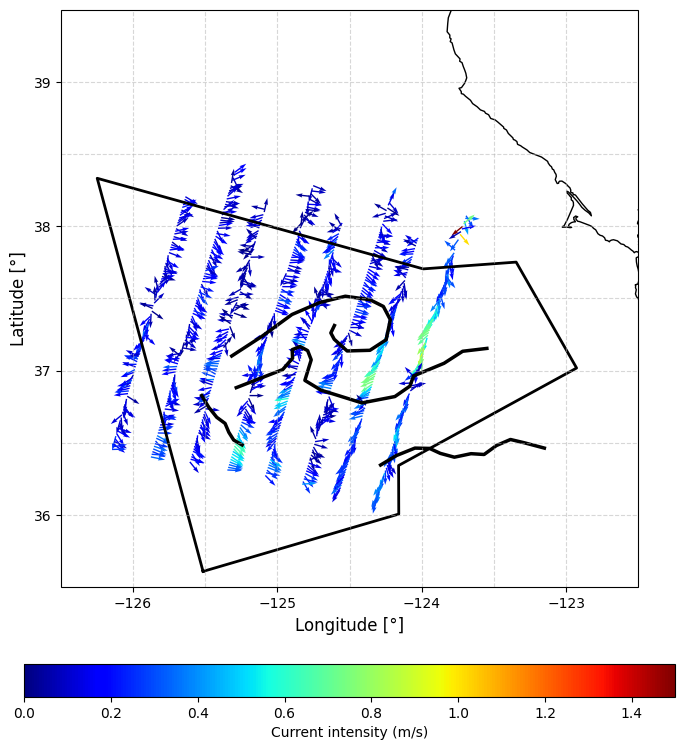

In [10]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
vmin=0
vmax=magnitude_threshold
scale_quiver = 40

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

plt.quiver(LON,LAT,UU/CC,VV/CC,CC,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, shrink=0.7)
cbar.set_label('Current intensity (m/s)')

# Définir les limites de la carte
ax.set_xlim(-126.5, -122.5)
ax.set_ylim(35.5, 39.5)

# Ajouter la côte et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la grille avec labels
gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)
gl.top_labels = False  # Supprimer les labels du haut
gl.right_labels = False  # Supprimer les labels de droite

xticks = [-126, -125, -124, -123]  # Longitudes spécifiques
yticks = [36, 37, 38, 39]  # Latitudes spécifiques

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  # Définir les ticks en projection géographique
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)

plt.savefig('L1B_2704.png')
# Affichage de la carte
plt.show()

/tmp/ipykernel_36282/1154396470.py:97: RuntimeWarning: invalid value encountered in divide
  plt.quiver(LON,LAT,UU/CC,VV/CC,color='magenta',scale=scale_quiver,width=thick,transform=ccrs.PlateCarree(),label='L1B')


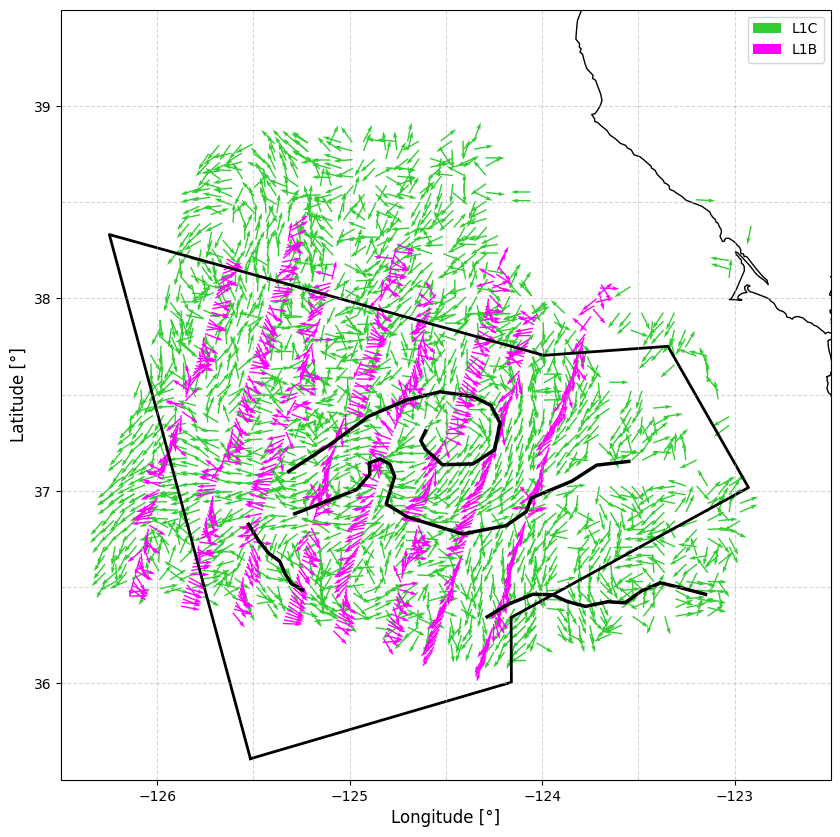

In [11]:
# Coordonnées KML et fronts
# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]

# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]

thick = 0.0018
nb_pt = 1
scale_quiver = 40
width_front = 2.5

# plt.figure(figsize=(14, 12))

# Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=magnitude_threshold

fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

# q1 = plt.quiver(lon_BF10, lat_BF10, U_BF10, V_BF10, C_BF10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q2 = plt.quiver(lon_BG10, lat_BG10, U_BG10, V_BG10, C_BG10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q3 = plt.quiver(lon_BH10, lat_BH10, U_BH10, V_BH10, C_BH10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q4 = plt.quiver(lon_CF10, lat_CF10, U_CF10, V_CF10, C_CF10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q5 = plt.quiver(lon_CG10, lat_CG10, U_CG10, V_CG10, C_CG10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # q6 = plt.quiver(lon_CJ10, lat_CJ10, U_CJ10, V_CJ10, C_CJ10,scale=scale_quiver,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q7 = plt.quiver(lon_CH10, lat_CH10, U_CH10, V_CH10, C_CH10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q8 = plt.quiver(lon_DF10, lat_DF10, U_DF10, V_DF10, C_DF10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q9 = plt.quiver(lon_DG10, lat_DG10, U_DG10, V_DG10, C_DG10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q10 = plt.quiver(lon_DH10, lat_DH10, U_DH10, V_DH10, C_DH10,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 


# plt.quiver(LON,LAT,UU,VV,scale=scale_quiver,width=thick,transform=ccrs.PlateCarree())

q1 = plt.quiver(lon_BF10, lat_BF10, U_BF_norm, V_BF_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax),transform=ccrs.PlateCarree(),label='L1C') 
q2 = plt.quiver(lon_BG10, lat_BG10, U_BG_norm, V_BG_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q3 = plt.quiver(lon_BH10, lat_BH10, U_BH_norm, V_BH_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q4 = plt.quiver(lon_CF10, lat_CF10, U_CF_norm, V_CF_norm,color="limegreen",scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax),transform=ccrs.PlateCarree()) 
q5 = plt.quiver(lon_CG10, lat_CG10, U_CG_norm, V_CG_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# q6 = plt.quiver(lon_CJ10, lat_CJ10, U_CJ_norm, V_CJ_norm,scale=scale_quiver,width=thick, transform=ccrs.PlateCarree()) 
q7 = plt.quiver(lon_CH10, lat_CH10, U_CH_norm, V_CH_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q8 = plt.quiver(lon_DF10, lat_DF10, U_DF_norm, V_DF_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q9 = plt.quiver(lon_DG10, lat_DG10, U_DG_norm, V_DG_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
q10 = plt.quiver(lon_DH10, lat_DH10, U_DH_norm, V_DH_norm,color="limegreen",scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

plt.quiver(LON,LAT,UU/CC,VV/CC,color='magenta',scale=scale_quiver,width=thick,transform=ccrs.PlateCarree(),label='L1B')


# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
# sm.set_array([])
# # Ajouter la colorbar globale à la figure
# cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
# cbar.set_label('Current intensity (m/s)')
# Définir les limites de la carte
ax.set_xlim(-126.5, -122.5)
ax.set_ylim(35.5, 39.5)

# Ajouter la côte et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la grille avec labels
gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)
gl.top_labels = False  # Supprimer les labels du haut
gl.right_labels = False  # Supprimer les labels de droite

xticks = [-126, -125, -124, -123]  # Longitudes spécifiques
yticks = [36, 37, 38, 39]  # Latitudes spécifiques

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  # Définir les ticks en projection géographique
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)

plt.legend()
plt.savefig('L1C_L1B_quiver.png')
plt.show()


# # Ajouter une grille
# ax.coastlines()
# ax.gridlines(draw_labels=True ,linestyle="--", alpha=0.5)
# plt.xlabel('longitude [°]')
# plt.xlim(-127, -122.5)
# plt.ylim(35.5, 40)
# # plt.savefig('L1C_L1B_quiver.png')
# # Affichage de la carte
# plt.show()

#################################################################################################################################

# # Coordonnées KML et fronts
# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]

# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]

# thick = 0.003
# nb_pt = 1
# scale_quiver = 40
# width_front = 2.5

# # plt.figure(figsize=(14, 12))

# # # Tracé des lignes définies par les coordonnées KML

# # Fonction pour extraire les coordonnées x et y
# def extract_coords(front):
#     x_coords = [point[0] for point in front]
#     y_coords = [point[1] for point in front]
#     return x_coords, y_coords

# vmin=0
# vmax=magnitude_threshold

# fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# # Tracer les fronts
# plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

# x1, y1 = extract_coords(front1)
# plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

# x2, y2 = extract_coords(front2)
# plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

# x3, y3 = extract_coords(front3)
# plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

# x4, y4 = extract_coords(front4)
# plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())


# # q1 = plt.quiver(lon_BF10, lat_BF10, U_BF_norm, V_BF_norm,C_BF10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax),transform=ccrs.PlateCarree()) 
# # q2 = plt.quiver(lon_BG10, lat_BG10, U_BG_norm, V_BG_norm,C_BG10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # q3 = plt.quiver(lon_BH10, lat_BH10, U_BH_norm, V_BH_norm,C_BH10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # q4 = plt.quiver(lon_CF10, lat_CF10, U_CF_norm, V_CF_norm,C_CF10,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax),transform=ccrs.PlateCarree()) 
# # q5 = plt.quiver(lon_CG10, lat_CG10, U_CG_norm, V_CG_norm,C_CG10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # # q6 = plt.quiver(lon_CJ10, lat_CJ10, U_CJ_norm, V_CJ_norm,scale=scale_quiver,width=thick, transform=ccrs.PlateCarree()) 
# # q7 = plt.quiver(lon_CH10, lat_CH10, U_CH_norm, V_CH_norm,C_CH10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # q8 = plt.quiver(lon_DF10, lat_DF10, U_DF_norm, V_DF_norm,C_DF10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # q9 = plt.quiver(lon_DG10, lat_DG10, U_DG_norm, V_DG_norm,C_DG10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # q10 = plt.quiver(lon_DH10, lat_DH10, U_DH_norm, V_DH_norm,C_DH10,scale=scale_quiver,width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
# # plt.quiver(LON,LAT,UU/CC,VV/CC,CC,scale=scale_quiver,width=thick,cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
# sm.set_array([])
# # Ajouter la colorbar globale à la figure
# cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
# cbar.set_label('Current intensity (m/s)')

# plt.xlim(-127, -122.5)
# plt.ylim(35.5, 40)
# # Ajouter une grille
# ax.coastlines()
# ax.gridlines(draw_labels=True)
# plt.savefig('L1C_L1B.png')
# # Affichage de la carte
# plt.show()


### Autre représentation pour papier ?

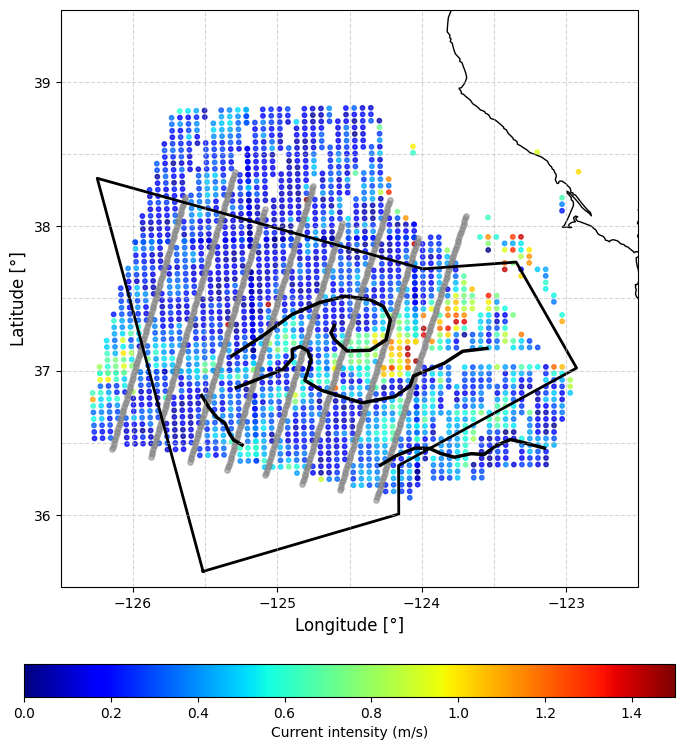

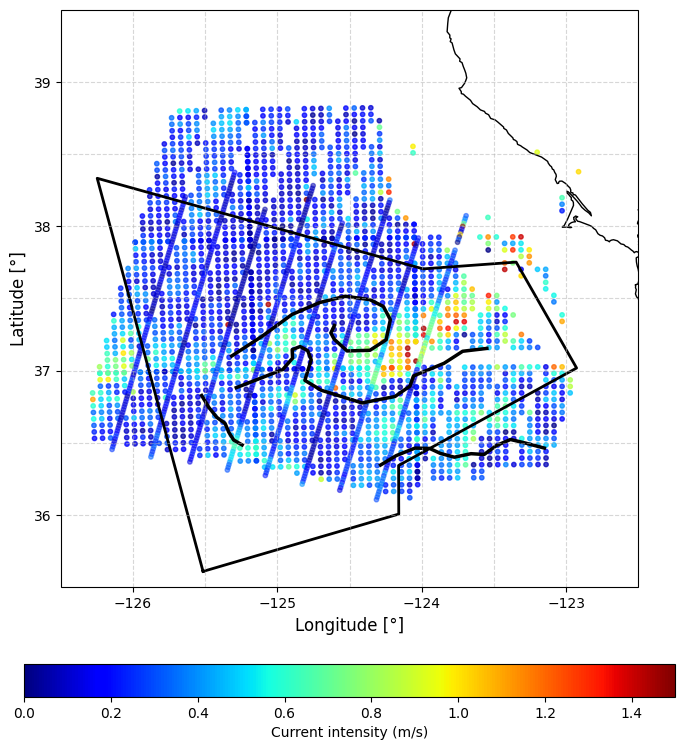

In [12]:
# Représentation en scatter plot d'intensité

# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 13
width_front = 2.5
size=10
a=0.75
# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=magnitude_threshold

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())


sc1=plt.scatter(lon_BF10,lat_BF10,c=C_BF10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc2=plt.scatter(lon_BG10,lat_BG10,c=C_BG10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc3=plt.scatter(lon_BH10,lat_BH10,c=C_BH10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc4=plt.scatter(lon_CF10,lat_CF10,c=C_CF10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc5=plt.scatter(lon_CG10,lat_CG10,c=C_CG10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc6=plt.scatter(lon_CH10,lat_CH10,c=C_CH10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
# sc7=plt.scatter(lon_CJ10,lat_CJ10,c=C_CJ10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc8=plt.scatter(lon_DF10,lat_DF10,c=C_DF10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc9=plt.scatter(lon_DG10,lat_DG10,c=C_DG10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc10=plt.scatter(lon_DH10,lat_DH10,c=C_DH10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())

plt.scatter(LON,LAT, c="gray", s=15, alpha=0.5, transform=ccrs.PlateCarree())



norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, shrink=0.7)
cbar.set_label('Current intensity (m/s)')

# Définir les limites de la carte
ax.set_xlim(-126.5, -122.5)
ax.set_ylim(35.5, 39.5)

# Ajouter la côte et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la grille avec labels
gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)
gl.top_labels = False  # Supprimer les labels du haut
gl.right_labels = False  # Supprimer les labels de droite

xticks = [-126, -125, -124, -123]  # Longitudes spécifiques
yticks = [36, 37, 38, 39]  # Latitudes spécifiques

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  # Définir les ticks en projection géographique
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)

plt.savefig('L1C_scatter_2704.png')
# Affichage de la carte
plt.show()


#################################################################################################################################


# Représentation en scatter plot d'intensité

# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.003
nb_pt = 1
scale_quiver = 13
width_front = 2.5

# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=magnitude_threshold

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())


sc1=plt.scatter(lon_BF10,lat_BF10,c=C_BF10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc2=plt.scatter(lon_BG10,lat_BG10,c=C_BG10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc3=plt.scatter(lon_BH10,lat_BH10,c=C_BH10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc4=plt.scatter(lon_CF10,lat_CF10,c=C_CF10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc5=plt.scatter(lon_CG10,lat_CG10,c=C_CG10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc6=plt.scatter(lon_CH10,lat_CH10,c=C_CH10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
# sc7=plt.scatter(lon_CJ10,lat_CJ10,c=C_CJ10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc8=plt.scatter(lon_DF10,lat_DF10,c=C_DF10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc9=plt.scatter(lon_DG10,lat_DG10,c=C_DG10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc10=plt.scatter(lon_DH10,lat_DH10,c=C_DH10, cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())

plt.scatter(LON,LAT, c=CC, s=size,cmap='jet',clim=(vmin, vmax), alpha=0.5, transform=ccrs.PlateCarree())



norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, shrink=0.7)
cbar.set_label('Current intensity (m/s)')

# Définir les limites de la carte
ax.set_xlim(-126.5, -122.5)
ax.set_ylim(35.5, 39.5)

# Ajouter la côte et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la grille avec labels
gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)
gl.top_labels = False  # Supprimer les labels du haut
gl.right_labels = False  # Supprimer les labels de droite

xticks = [-126, -125, -124, -123]  # Longitudes spécifiques
yticks = [36, 37, 38, 39]  # Latitudes spécifiques

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  # Définir les ticks en projection géographique
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)

plt.savefig('L1C_L1B_scatter.png')
# Affichage de la carte
plt.show()


### Importer les données avec la boite de 2km

In [13]:
# os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/X_band/')
# os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/X_band/')

# # CF

# U_CF = np.load('U_CF.npy')
# V_CF = np.load('V_CF.npy')

# lat_CF=np.load('lat_CF.npy')
# lon_CF=np.load('lon_CF.npy')

# C_CF=np.load('C_CF.npy')


# lon_CF2, lat_CF2, U_CF2, V_CF2, C_CF2= filter_vectors(lon_CF, lat_CF, U_CF, V_CF, C_CF, magnitude_threshold)


In [14]:
# # os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/')
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/')


# LON_1C_1B=np.concatenate([LON,lon_CF2])
# LAT_1C_1B=np.concatenate([LAT,lat_CF2])

# U_1C_1B=np.concatenate([UU,U_CF2])
# V_1C_1B=np.concatenate([VV,V_CF2])

LON_1C_1B=np.concatenate([LON,lon_CF10])
LAT_1C_1B=np.concatenate([LAT,lat_CF10])

U_1C_1B=np.concatenate([UU,U_CF10])
V_1C_1B=np.concatenate([VV,V_CF10])

## Comparaison X band radar

In [15]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/')
# os.chdir('/SVG-ALEX/acuevas/Bureau/S2_ALEXANDRA/')

import scipy.io
from scipy.io import savemat
X_band_current=scipy.io.loadmat('xband_currents_27_Apr_2023.mat')

lon_xband=X_band_current['longitude']
lat_xband=X_band_current['latitude']

lon_xband=X_band_current['longitude']
lat_xband=X_band_current['latitude']

u_xband=X_band_current['u']
v_xband=X_band_current['v']
time_xband=X_band_current['time']


print(np.shape(lon_xband))
print(np.shape(lat_xband))
print(np.shape(u_xband))
print(np.shape(v_xband))
print(np.shape(time_xband))


c_xband=np.sqrt(u_xband**2+v_xband**2)

(19305, 1)
(19305, 1)
(19305, 1)
(19305, 1)
(19305, 1)


In [16]:
print(time_xband[0])
t1=np.datetime64('2023-04-27 22:39', 'ns')
t0=np.datetime64('2023-01-01 00:00', 'ns')
tdiff=(t1-t0);
tds = tdiff / np.timedelta64(1, 's')/86400
print('tds:',tds) 

indt=np.where(abs(time_xband-tds) < 0.25 )[0] # Données à moins de 6h
# indt=np.where(abs(time_xband-tds) < 0.125 )[0] # Données à moins de 3h
# indt=np.where(abs(time_xband-tds) < 1/24)[0] # à moins de 1h
# indt=np.where(abs(time_xband-tds) < 1/48 )[0] # à moins de 30min


# print(indt)

[116.3333353]
tds: 116.94375


In [17]:
# print(time_xband[0])
# t1 = np.datetime64('2023-04-27 22:39', 'ns')
# t0 = np.datetime64('2023-01-01 00:00', 'ns')
# tdiff = (t1 - t0)
# tds = tdiff / np.timedelta64(1, 's') / 86400
# print('tds:', tds) 

# # Définir la plage de 3h avant et après (0.0208 jours)
# time_min = tds - 0.125
# time_max = tds + 0.125

# # Sélection des indices dans cet intervalle
# indt = np.where((time_xband >= time_min) & (time_xband <= time_max))[0]
# print("Indices entre -30 min et +30 min:", indt)


In [18]:
min_lon=min(lon_xband[indt])
min_lat=min(lat_xband[indt])
max_lon=max(lon_xband[indt])
max_lat=max(lat_xband[indt])

In [19]:
mask = (LON_1C_1B >= min_lon) & (LON_1C_1B <= max_lon) & \
       (LAT_1C_1B >= min_lat) & (LAT_1C_1B <= max_lat)

LON_1C_1B=LON_1C_1B[mask]
LAT_1C_1B=LAT_1C_1B[mask]
U_1C_1B=U_1C_1B[mask]
V_1C_1B=V_1C_1B[mask]
#CS2=CS2[mask]

### Superposition X band radar et S2 1C 1B

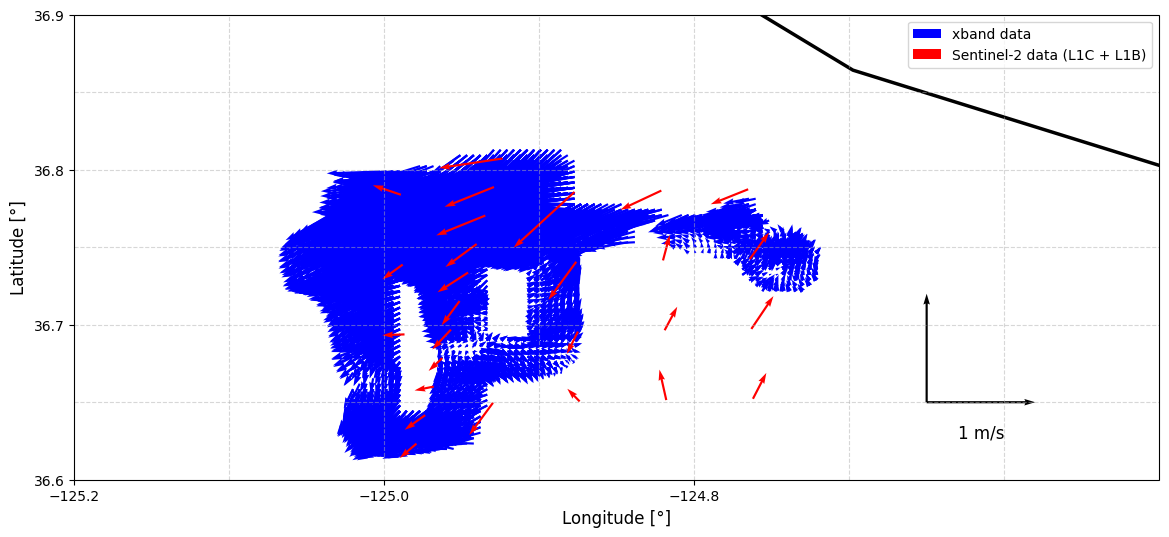

In [20]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')

# Coordonnées KML et fronts
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]

thick = 0.002
nb_pt = 1
scale_quiver = 10
width_front = 2.5

# plt.figure(figsize=(14, 12))

# # Tracé des lignes définies par les coordonnées KML

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

vmin=0
vmax=magnitude_threshold

fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer les fronts
plt.plot(x, y, 'k', linewidth=2,transform=ccrs.PlateCarree())

x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front,transform=ccrs.PlateCarree())

###############
##############
plt.quiver(lon_xband[indt],lat_xband[indt],u_xband[indt],v_xband[indt],color="blue", scale=scale_quiver,label='xband data', width=thick,transform=ccrs.PlateCarree())
plt.quiver(LON_1C_1B,LAT_1C_1B,U_1C_1B,V_1C_1B,color="red",scale=scale_quiver, width=thick,label='Sentinel-2 data (L1C + L1B)',transform=ccrs.PlateCarree())

# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
# sm.set_array([])
# # Ajouter la colorbar globale à la figure
# cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
# cbar.set_label('Current intensity (m/s)')

ax.quiver(-124.65, 36.65, 1, 0, color="black", scale=scale_quiver, width=thick, transform=ccrs.PlateCarree())
ax.text(-124.65 + 0.02, 36.65-0.02, '1 m/s', color="black", fontsize=12, verticalalignment='center')

ax.quiver(-124.65, 36.65, 0, 1, color="black", scale=scale_quiver, width=thick, transform=ccrs.PlateCarree())


# Définir les limites de la carte
ax.set_xlim(-125.2, -124.5)
ax.set_ylim(36.6, 36.9)

# Ajouter la côte et les frontières
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la grille avec labels
gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)
gl.top_labels = False  # Supprimer les labels du haut
gl.right_labels = False  # Supprimer les labels de droite

xticks = [-125.2,-125,-124.8]  # Longitudes spécifiques
yticks = [36.6,36.7, 36.8,36.9]  # Latitudes spécifiques

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  # Définir les ticks en projection géographique
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)
plt.legend()
# plt.savefig('xband_L1CL1B_inf6h.png')
plt.show()


### Interpolation de X band radar et S2 1C 1B

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import griddata
# # from sklearn.metrics import r2_score
# from scipy.stats import pearsonr

In [22]:
# print(np.shape(LAT_1C_1B))

In [23]:
# lat_xband = lat_xband.squeeze()  # Shape becomes (19305,)
# lon_xband = lon_xband.squeeze()  # Shape becomes (19305,)
# print("lat_xband shape:", np.shape(lat_xband))  # Should be (19305,)
# print("lon_xband shape:", np.shape(lon_xband))  # Should be (19305,)
# lon_grid, lat_grid = np.meshgrid(lon_xband, lat_xband)
# print("lon_grid shape:", np.shape(lon_grid))  # Should be (19305, 19305)
# print("lat_grid shape:", np.shape(lat_grid))  # Should be (19305, 19305)
# point = np.array([lon_xband.flatten(), lat_xband.flatten()]).T  # Shape (19305, 2)
# print("point shape:", point.shape)  # Should be (19305, 2)
# U_value = u_xband.flatten()
# V_value = v_xband.flatten()

# print("U_value shape:", np.shape(U_value))  # Should be (372683025,)
# # Interpolation
# U_xband_interp = griddata(point, U_value, (LON_1C_1B, LAT_1C_1B), method='linear')
# V_xband_interp = griddata(point, V_value, (LON_1C_1B, LAT_1C_1B), method='linear')

# plt.figure(figsize=(10, 8))
# plt.quiver(LON_1C_1B, LAT_1C_1B, U_xband_interp, V_xband_interp, scale=10, color='blue',label='xband radar interpolated')
# plt.quiver(LON_1C_1B,LAT_1C_1B,U_1C_1B,V_1C_1B,scale=10,color='red',label='Current S2')
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# # plt.title("Champ de vecteurs (U, V)")
# plt.xlim(-125.1 ,-124.7)
# plt.ylim(36.5, 37)
# plt.legend()
# plt.grid(True)
# plt.show()

In [24]:
# # Calcul de l'intensité des vecteurs
# intensite_S2 = np.sqrt(U_1C_1B**2 + V_1C_1B**2)
# intensite_xband = np.sqrt(U_xband_interp**2 + V_xband_interp**2)

# # Calcul de la direction (angle) des vecteurs en degrés (0 à 360°)
# direction_S2 = np.mod(np.degrees(np.arctan2(V_1C_1B, U_1C_1B)), 360)
# direction_xband = np.mod(np.degrees(np.arctan2(V_xband_interp, U_xband_interp)), 360)

# plt.figure(figsize=(8, 6))
# plt.scatter(intensite_xband, intensite_S2, s=15, label="Intensité S2")
# plt.plot([intensite_S2.min(), intensite_S2.max()], 
#          [intensite_S2.min(), intensite_S2.max()], 'r--', label="y = x ")
# plt.ylabel("Intensité S2")
# plt.xlabel("Intensité Xband")
# plt.xlim(0, 1)  # Bloque les valeurs entre 0 et 360°
# plt.ylim(0, 1)  # Bloque les valeurs entre 0 et 360°
# plt.title("Comparaison des intensités S2 X band")
# plt.legend()
# plt.grid()
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.scatter(direction_xband, direction_S2, s=15, label="direction S2")
# plt.plot([0, 360], [0, 360], 'r--', label="y = x ")
# plt.ylabel("direction S2 (degrés)")
# plt.xlabel("direction xband (degrés)")
# plt.xlim(0, 360)  # Bloque les valeurs entre 0 et 360°
# plt.ylim(0, 360)  # Bloque les valeurs entre 0 et 360°
# plt.title("Comparaison des directions S2 X band")
# plt.legend()
# plt.grid()
# plt.show()


In [25]:
# Fonction pour calculer la RMSE
def rmse(y_real, y_pred):
    return np.sqrt(np.nanmean((y_real - y_pred) ** 2))

# Calcul de la RMSE pour l'intensité et la direction
# rmse_intensity = rmse(intensite_S2, intensite_xband)
# rmse_direction = rmse(direction_S2, direction_xband)

def angular_rmse(y_true, y_pred):

    # Convertir les angles en radians
    y_true_rad = np.radians(y_true)
    y_pred_rad = np.radians(y_pred)

    # Calcul de l'erreur angulaire corrigée
    angular_diff = np.arctan2(np.sin(y_pred_rad - y_true_rad), np.cos(y_pred_rad - y_true_rad))

    # Calcul de la RMSE classique sur ces différences angulaires
    rmse = np.sqrt(np.nanmean(angular_diff**2))

    # Retour en degrés pour l'interprétation
    return np.degrees(rmse)
# rmse_direction = angular_rmse(direction_S2, direction_xband)

# print(f"RMSE - Intensité : {rmse_intensity:.3f}")
# print(f"RMSE - Direction : {rmse_direction:.3f}")

### Comparaison L1C L1B Xband radar avec les points les plus proches

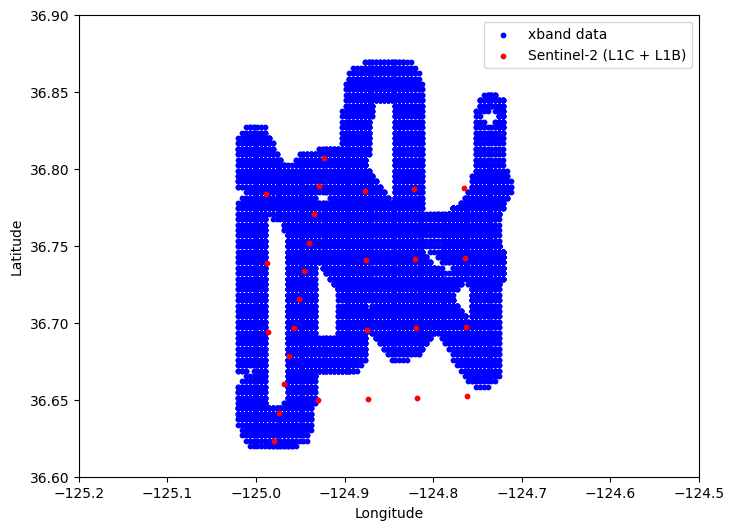

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(lon_xband,lat_xband, c='blue', label='xband data', s=10)
plt.scatter(LON_1C_1B,LAT_1C_1B, c='red', label='Sentinel-2 (L1C + L1B)', s=10)
plt.legend()
plt.xlim(-125.2,-124.5)
plt.ylim(36.6,36.9)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [27]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')

from scipy.spatial import cKDTree
lon_xband2=lon_xband[indt]
lat_xband2=lat_xband[indt] 
u_xband2=u_xband[indt]
v_xband2=v_xband[indt]

points_S2=np.column_stack((LON_1C_1B,LAT_1C_1B))
points_xband=np.column_stack((lon_xband2,lat_xband2))

############# Algo de plus proche voisin ####################"

# Création de l'arbre KD pour une recherche rapide
tree=cKDTree(points_xband)
# Recherche du point xband le plus proche de S2
distances,indices=tree.query(points_S2)
                                                       

lat_xband_nearest=lat_xband2[indices]
lon_xband_nearest=lon_xband2[indices]

# plt.figure(figsize=(8,6))
# plt.scatter(lon_xband_nearest,lat_xband_nearest, c='blue', label='xband data', s=10)
# plt.scatter(LON_1C_1B,LAT_1C_1B, c='red', label='Sentinel-2 (L1C + L1B)', s=10)
# plt.legend()
# plt.xlim(-125.2,-124.5)
# plt.ylim(36.6,36.9)
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

U_xband_nearest=u_xband2[indices]
V_xband_nearest=v_xband2[indices]
# Calcul des intensités et directions
intensite_S2 = np.sqrt(U_1C_1B**2 + V_1C_1B**2)
direction_S2 = np.mod(np.degrees(np.arctan2(V_1C_1B, U_1C_1B)), 360)

intensite_xband_nearest=np.sqrt(U_xband_nearest**2+V_xband_nearest**2)
direction_xband_nearest=np.mod(np.degrees(np.arctan2(V_xband_nearest, U_xband_nearest)), 360)

lat_mean = np.mean(LAT_1C_1B)  # Latitude moyenne de tes données
distances_km = distances * 111.32 * np.cos(np.radians(lat_mean))

print("Distances en kilomètres :", distances_km)
print(distances)
print('max distance',max(distances_km))

# # print(lat_xband_nearest)


Distances en kilomètres : [0.16264827 0.04692636 0.11364644 0.19250385 0.14586037 0.07617601
 0.1600138  0.14615751 0.40634462 0.1185586  0.17238681 0.26097746
 0.16006684 0.0999281  0.36328412 1.96245823 0.23779384 0.16362302
 0.07772265 5.72239768 4.64860074 1.01372855 1.09528979 6.21606334
 2.26323199 0.05398528 0.54609749]
[0.00182272 0.00052588 0.00127358 0.0021573  0.00163459 0.00085367
 0.0017932  0.00163792 0.00455371 0.00132863 0.00193186 0.00292465
 0.00179379 0.00111985 0.00407115 0.02199231 0.00266484 0.00183364
 0.000871   0.06412813 0.05209461 0.01136036 0.01227438 0.0696604
 0.02536294 0.00060499 0.00611985]
max distance 6.216063342058502


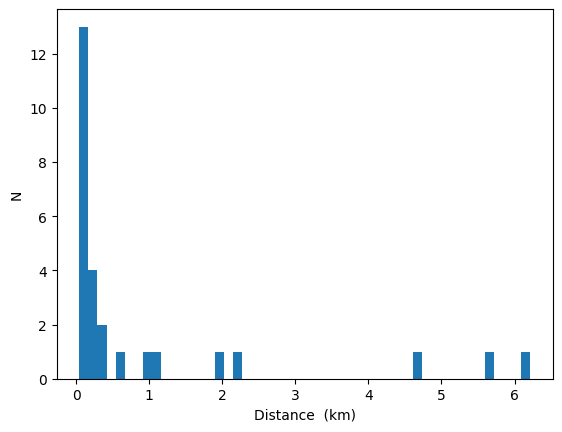

In [28]:
plt.hist(distances_km, bins=50)
plt.xlabel("Distance  (km)")
plt.ylabel("N")
# plt.savefig('distance.png')
plt.show()


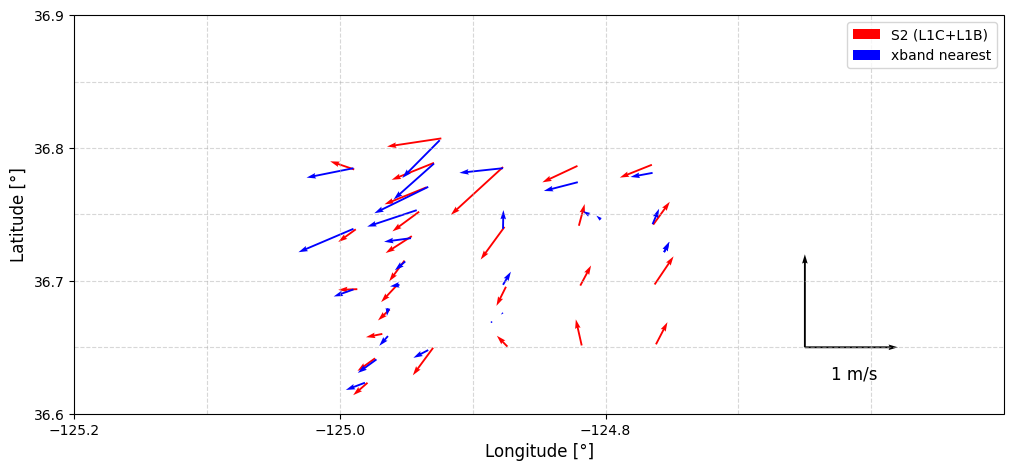

In [29]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/Rascle_et_al/Results/')

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
thick=0.002
ax.quiver(LON_1C_1B, LAT_1C_1B, U_1C_1B, V_1C_1B, color='red', scale=10, width=thick,transform=ccrs.PlateCarree(), label="S2 (L1C+L1B)")

ax.quiver(lon_xband_nearest, lat_xband_nearest, U_xband_nearest, V_xband_nearest, color='blue', scale=10,width=thick, transform=ccrs.PlateCarree(), label="xband nearest")

ax.quiver(-124.65, 36.65, 1, 0, color="black", scale=scale_quiver, width=thick, transform=ccrs.PlateCarree())
ax.text(-124.65 + 0.02, 36.65-0.02, '1 m/s', color="black", fontsize=12, verticalalignment='center')

ax.quiver(-124.65, 36.65, 0, 1, color="black", scale=scale_quiver, width=thick, transform=ccrs.PlateCarree())

ax.set_xlim(-125.2, -124.5)
ax.set_ylim(36.6, 36.9)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter la grille avec labels
gl = ax.gridlines(draw_labels=False, linestyle="--", alpha=0.5)
gl.top_labels = False  
gl.right_labels = False  

xticks = [-125.2,-125,-124.8]  
yticks = [36.6,36.7, 36.8,36.9]  

ax.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.set_xlabel('Longitude [°]', fontsize=12)
ax.set_ylabel('Latitude [°]', fontsize=12)
plt.legend()
# plt.savefig('L1C1B_xband_nearest.png')
plt.show()

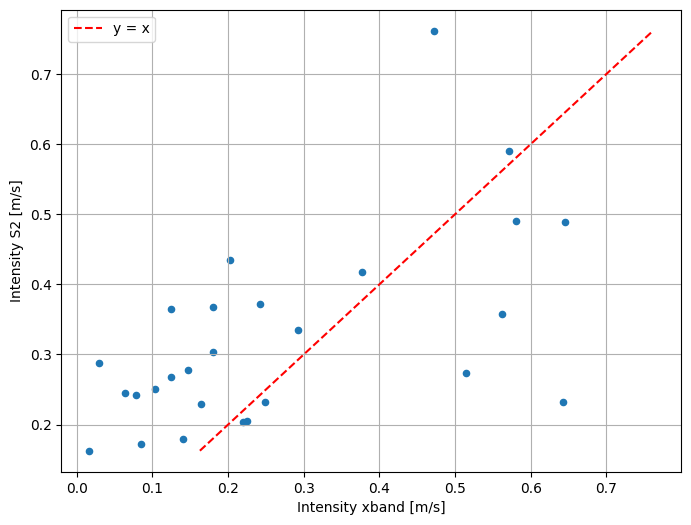

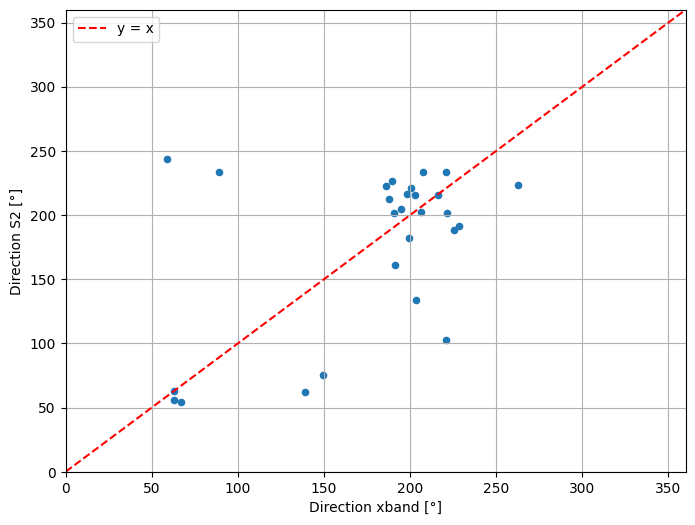

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(intensite_xband_nearest, intensite_S2, s=20)
plt.plot([intensite_S2.min(), intensite_S2.max()], 
         [intensite_S2.min(), intensite_S2.max()], 'r--', label="y = x")
plt.ylabel("Intensity S2 [m/s]")
plt.xlabel("Intensity xband [m/s]")
# plt.title("Comparaison des intensités des vecteurs avec plus proche voisin")
plt.legend()
plt.grid()
# plt.savefig('scatter_intensity.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(direction_xband_nearest, direction_S2, s=20)
plt.plot([0, 360], [0, 360], 'r--', label="y = x")
plt.ylabel("Direction S2 [°]")
plt.xlabel("Direction xband [°]")
plt.xlim(0, 360)
plt.ylim(0, 360)
# plt.title("Comparaison des directions des vecteurs avec plus proche voisin")
plt.legend()
plt.grid()
# plt.savefig('scatter_direction.png')
plt.show()


In [31]:
# Calcul de la RMSE pour l'intensité et la direction
rmse_intensity = rmse(intensite_S2, intensite_xband_nearest)
rmse_direction = angular_rmse(direction_S2, direction_xband_nearest)

print(f"RMSE - Intensité : {rmse_intensity:.3f}")
print(f"RMSE - Direction : {rmse_direction:.3f}")

RMSE - Intensité : 0.245
RMSE - Direction : 83.903


In [32]:
# print(np.shape(intensite_xband_nearest))
# print(np.shape(intensite_S2))

In [33]:
from scipy.stats import pearsonr

correlation_coefficient, _ = pearsonr(intensite_S2, intensite_xband_nearest.flatten())
correlation_coefficient1, _ = pearsonr(direction_S2, direction_xband_nearest.flatten())


print(f"Le coefficient de corrélation intensité r entre les données et la droite y=x est : {correlation_coefficient:.4f}")
print(f"Le coefficient de corrélation direction r entre les données et la droite y=x est : {correlation_coefficient1:.4f}")


Le coefficient de corrélation intensité r entre les données et la droite y=x est : 0.5790
Le coefficient de corrélation direction r entre les données et la droite y=x est : 0.5003
